<a href="https://colab.research.google.com/github/kridtapon/10-Types-of-Moving-Average-/blob/main/10_Types_of_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [13]:
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np

In [47]:
# Download data
data = yf.download("BTC-USD", start="2020-01-01", end="2024-01-01", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [48]:
data_clean = data.copy()

In [49]:
#df = df.dropna()

data_clean = data_clean.ffill()

In [50]:
data_clean.columns = ['Date','Close','High','Low','Open','Volume']

In [51]:
data_clean.drop(['Date'], axis='columns', inplace=True)

In [52]:
df_N = data_clean.copy()

In [53]:
df_N

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01 00:00:00+00:00,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02 00:00:00+00:00,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03 00:00:00+00:00,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04 00:00:00+00:00,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05 00:00:00+00:00,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...
2023-12-27 00:00:00+00:00,43442.855469,43683.160156,42167.582031,42518.468750,25260941032
2023-12-28 00:00:00+00:00,42627.855469,43804.781250,42318.550781,43468.199219,22992093014
2023-12-29 00:00:00+00:00,42099.402344,43124.324219,41424.062500,42614.644531,26000021055


In [54]:
# Extract OHLC data
ohlc_data = df_N[['Open', 'High', 'Low', 'Close','Volume']]

In [55]:
ohlc_data

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01 00:00:00+00:00,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
2020-01-02 00:00:00+00:00,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
2020-01-03 00:00:00+00:00,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
2020-01-04 00:00:00+00:00,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
2020-01-05 00:00:00+00:00,7410.451660,7544.497070,7400.535645,7411.317383,19725074095
...,...,...,...,...,...
2023-12-27 00:00:00+00:00,42518.468750,43683.160156,42167.582031,43442.855469,25260941032
2023-12-28 00:00:00+00:00,43468.199219,43804.781250,42318.550781,42627.855469,22992093014
2023-12-29 00:00:00+00:00,42614.644531,43124.324219,41424.062500,42099.402344,26000021055


<ipython-input-59-ce198a2af436>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc_data[ma_name] = ma_values
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


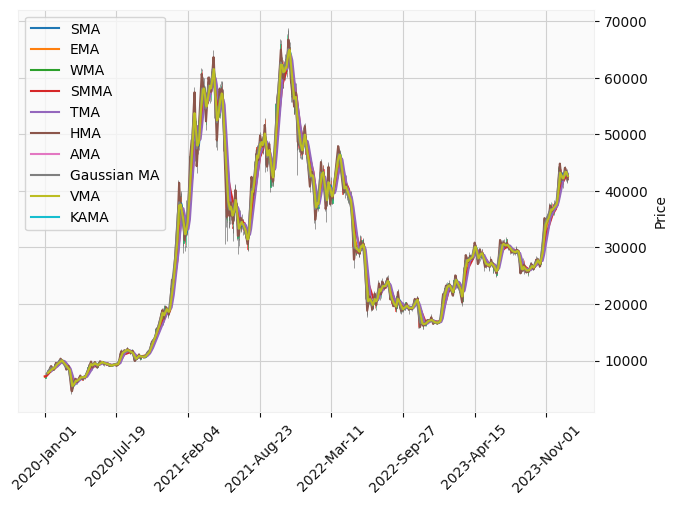

In [59]:
# Define moving average functions
def sma(data, window):
    return data.rolling(window=window).mean()

def ema(data, window):
    return data.ewm(span=window, adjust=False).mean()

def wma(data, window):
    weights = np.arange(1, window + 1)
    return data.rolling(window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

def smma(data, window):
    return data.ewm(alpha=1/window, adjust=False).mean()

def tma(data, window):
    return sma(sma(data, window), window)

def hma(data, window):
    half_window = int(window / 2)
    sqrt_window = int(np.sqrt(window))
    wma_half = wma(data, half_window)
    diff = 2 * wma_half - wma(data, window)
    return wma(diff, sqrt_window)

def ama(data, window, fast=2, slow=30):
    sc_fast = 2 / (fast + 1)
    sc_slow = 2 / (slow + 1)
    sc = ((data.diff().abs()) / data.diff(periods=window).abs().rolling(window).sum()).clip(0, 1)
    smoothed_sc = sc * (sc_fast - sc_slow) + sc_slow
    ama_result = pd.Series(np.nan, index=data.index)
    ama_result.iloc[0] = data.iloc[0]
    for i in range(1, len(data)):
        ama_result.iloc[i] = ama_result.iloc[i - 1] + smoothed_sc.iloc[i] * (data.iloc[i] - ama_result.iloc[i - 1])
    return ama_result

def gaussian_ma(data, window):
    half_window = window // 2
    if window % 2 == 0:
        weights = np.exp(-0.5 * (np.arange(-half_window + 0.5, half_window + 0.5) / (window / 4))**2)
    else:
        weights = np.exp(-0.5 * (np.arange(-half_window, half_window + 1) / (window / 4))**2)
    weights /= weights.sum()
    return data.rolling(window=window, center=True).apply(lambda x: np.dot(x, weights), raw=True)

def vma(data, window):
    weights = np.arange(1, window + 1)
    return data.rolling(window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

def kama(data, window, fast=2, slow=30):
    sc_fast = 2 / (fast + 1)
    sc_slow = 2 / (slow + 1)
    volatility = data.diff().abs().rolling(window).sum()
    efficiency_ratio = data.diff(window).abs() / volatility
    smoothing_constant = (efficiency_ratio * (sc_fast - sc_slow) + sc_slow) ** 2
    kama_result = pd.Series(index=data.index, dtype="float64")
    kama_result.iloc[0] = data.iloc[0]
    for i in range(1, len(data)):
        kama_result.iloc[i] = kama_result.iloc[i - 1] + smoothing_constant.iloc[i] * (data.iloc[i] - kama_result.iloc[i - 1])
    return kama_result

# Define window size
window = 10

# Calculate all types of moving averages
ma_results = {
    "SMA": sma(ohlc_data['Close'], window),
    "EMA": ema(ohlc_data['Close'], window),
    "WMA": wma(ohlc_data['Close'], window),
    "SMMA": smma(ohlc_data['Close'], window),
    "TMA": tma(ohlc_data['Close'], window),
    "HMA": hma(ohlc_data['Close'], window),
    "AMA": ama(ohlc_data['Close'], window),
    "Gaussian MA": gaussian_ma(ohlc_data['Close'], window),
    "VMA": vma(ohlc_data['Close'], window),
    "KAMA": kama(ohlc_data['Close'], window),
}

# Add moving averages to the OHLC dataframe
for ma_name, ma_values in ma_results.items():
    ohlc_data[ma_name] = ma_values

# Prepare addplot for each moving average
addplots = [
    mpf.make_addplot(ohlc_data[ma_name], label=ma_name, width=1.5) for ma_name in ma_results.keys()
]

# Plot candlestick chart with all MAs
mpf.plot(
    ohlc_data,
    type='candle',  # Candlestick plot
    style='yahoo',  # Styling
    addplot=addplots
)